Loading base model ()...

Using cache found in /home/luke/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..Done.
(1, 1, 370, 1226)
depth_1 complete


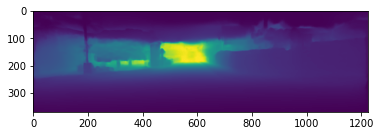

(1, 1, 370, 1226)
depth_2 complete


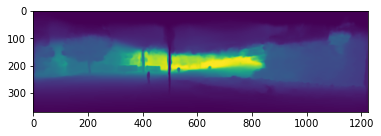

(1, 1, 370, 1226)
depth_3 complete


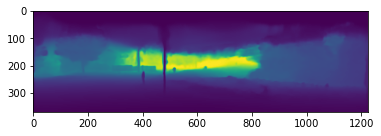

(1, 1, 370, 1226)
depth_4 complete


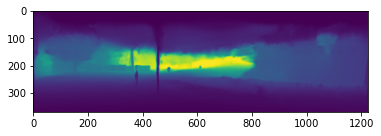

(1, 1, 370, 1226)
depth_5 complete


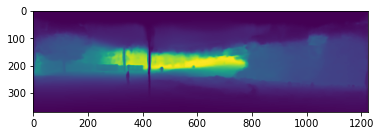

(1, 1, 370, 1226)
depth_6 complete


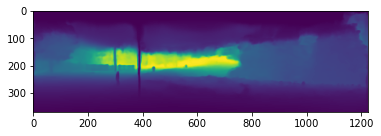

(1, 1, 370, 1226)
depth_7 complete


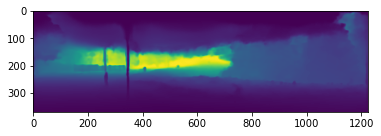

(1, 1, 370, 1226)
depth_8 complete


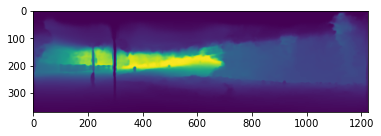

KeyboardInterrupt: 

In [2]:
from infer import InferenceHelper
import model_io
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
infer_helper = InferenceHelper(dataset='kitti')
import torch
# # predict depth of a batched rgb tensor
# example_rgb_batch = ...  
# bin_centers, predicted_depth = infer_helper.predict(example_rgb_batch)

# predict depth of a single pillow image
import csv
import utils
fileindex = None
csvfile = open("/home/luke/Documents/Academic/545/monodepth2/fileindex.csv", "r")
fileindex = csv.reader(csvfile, delimiter=' ', quotechar='|')
fileindexs = []
index = 0
for row in fileindex:
    fileindexs.append(row[0])
#print("-> Predicting on {:d} test images".format(len(paths)))
for file in fileindexs:
    path = "/home/luke/Documents/Academic/535/proj/deep-svo/catkin_ws/MiDaS/image_2/"
    file_path = path + file
    currentimage = Image.open(file_path)  # any rgb pillow image
    # plt.imshow(currentimage)
    # plt.show()
    bin_centers, predicted_depth= infer_helper.predict_pil(currentimage)
    print(predicted_depth.shape)
    #viz = utils.colorize(torch.from_numpy(predicted_depth.reshape(370,-1)).unsqueeze(0), cmap='magma',vmax=None,vmin=None)
    predicted_depth = np.array(predicted_depth.astype(np.float64)).reshape(370,-1)
    depth_cv = cv2.resize(predicted_depth,(1226,370), interpolation = cv2.INTER_CUBIC)
    #viz = utils.colorize(torch.from_numpy(depth_cv.reshape(376,-1)).unsqueeze(0), cmap='magma',vmax=None,vmin=None)
    #depth_cv = predicted_depth
    name_dest_npy = "/home/luke/Documents/Academic/535/proj/deep-svo/catkin_ws/MiDaS/output/depth_" + str(index)
    index+=1
    np.save(name_dest_npy, depth_cv.astype(np.float64))
    print("depth_" + str(index) + " complete")
    
    #depth_cv /= 255
    # ret,depthmap_visual = cv2.threshold(depth_cv,50.0,50.0,cv2.THRESH_TRUNC)
    # min_val, max_val, min_pt, max_pt = cv2.minMaxLoc(depth_cv)
    # depthmap_visual = 255.0 * (depthmap_visual - min_val) / (max_val - min_val)
    # depthmap_visual = depthmap_visual.astype(np.uint8)
    # #depthmap_visual = depthmap_visual.reshape(376,1241,1)

    
    # depthmap_visual = cv2.applyColorMap(depthmap_visual, 2)
   
    #print(viz.shape)
    plt.imshow(depth_cv)
    #plt.imshow(viz)
    plt.show()
    #print(depth_cv.shape)
    #break

#Image.show(viz,"result")
# predict depths of images stored in a directory and store the predictions in 16-bit format in a given separate dir
#infer_helper.predict_dir("/path/to/input/dir/containing_only_images/", "./test_imgs")